In [1]:
import numpy as np
from numpy import pi
import matplotlib.pyplot as plt
import pandas as pd

plt.rcParams['figure.figsize'] = (15,10)
plt.rcParams['font.size'] = 14
# plt.rcParams['image.cmap'] = 'plasma'
plt.rcParams['axes.linewidth'] = 2
from cycler import cycler
cols = plt.get_cmap('tab10').colors
plt.rcParams['axes.prop_cycle'] = cycler(color=cols)

def plot_2d(m, title=""):
    plt.imshow(m)
    plt.xticks([])
    plt.yticks([])
    plt.title(title)

In [2]:
gt = pd.read_csv('GlobalTemperatures.csv', header=0, index_col=0, parse_dates=True, squeeze=True)
gt.dropna(inplace = True)
gt.tail(13)

,LandAverageTemperature,LandAverageTemperatureUncertainty,LandMaxTemperature,LandMaxTemperatureUncertainty,LandMinTemperature,LandMinTemperatureUncertainty,LandAndOceanAverageTemperature,LandAndOceanAverageTemperatureUncertainty
dt,,,,,,,,
2014-12-01,4.850,0.090,10.190,0.148,-0.331,0.123,14.410,0.062
2015-01-01,3.881,0.130,9.432,0.090,-1.518,0.097,14.255,0.066
2015-02-01,4.664,0.121,10.497,0.092,-1.138,0.113,14.564,0.067
2015-03-01,6.740,0.060,12.659,0.096,0.894,0.079,15.193,0.061
2015-04-01,9.313,0.088,15.224,0.137,3.402,0.147,15.962,0.061
2015-05-01,12.312,0.081,18.181,0.117,6.313,0.153,16.774,0.058
2015-06-01,14.505,0.068,20.364,0.133,8.627,0.168,17.390,0.057
2015-07-01,15.051,0.086,20.904,0.109,9.326,0.225,17.611,0.058
2015-08-01,14.755,0.072,20.699,0.110,9.005,0.170,17.589,0.057


In [3]:
df = gt.reset_index(drop=True)

In [4]:
lat = df['LandAverageTemperature']
test = lat[1980:]
lat = lat[:1980]
lat

0        0.749
1        3.071
2        4.954
3        7.217
4       10.004
         ...  
1975    14.875
1976    13.091
1977    10.330
1978     6.713
1979     4.850
Name: LandAverageTemperature, Length: 1980, dtype: float64

# DECOMPOSITION
## EMBEDDING

CREATING A TRAJECTORY MATRIX X CONSIDERING WINDOW LENGTH AS L = 395

In [5]:
N = len(lat)
L = 360       # The window length
K = N - L + 1 # The number of columns in the trajectory matrix

In [6]:
# Create the trajectory matrix by pulling the relevant subseries (lag vectors) of lat, and stacking them as columns.
X = np.column_stack([lat[i:i+L] for i in range(0,K)])
X

array([[ 0.749,  3.071,  4.954, ...,  5.811,  3.185,  3.01 ],
       [ 3.071,  4.954,  7.217, ...,  3.185,  3.01 ,  2.704],
       [ 4.954,  7.217, 10.004, ...,  3.01 ,  2.704,  5.451],
       ...,
       [ 9.229,  5.526,  2.538, ..., 14.875, 13.091, 10.33 ],
       [ 5.526,  2.538,  1.755, ..., 13.091, 10.33 ,  6.713],
       [ 2.538,  1.755,  2.052, ..., 10.33 ,  6.713,  4.85 ]])

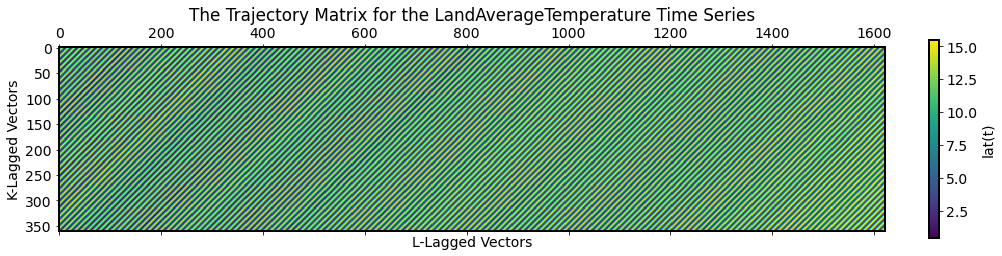

In [7]:
ax = plt.matshow(X)
plt.xlabel("L-Lagged Vectors")
plt.ylabel("K-Lagged Vectors")
plt.colorbar(ax.colorbar, fraction=0.025)
ax.colorbar.set_label("lat(t)")
plt.title("The Trajectory Matrix for the LandAverageTemperature Time Series");
plt.savefig('Output/lat-trajectory-mat.png', bbox_inches = 'tight')

## SINGULAR VALUE DECOMPOSITION

In [8]:
import numpy.linalg as npla
d = npla.matrix_rank(X) # The intrinsic dimensionality of the trajectory space.
U, S, VT = npla.svd(X)   # U matrix, Sigma matrix, V matrix respectively. By convention V^T is returned
# S = np.sqrt(S)
V = np.transpose(VT)
# S is actually 1D np ndarray
# U and V are 2D np ndarray
# in this case, rank of matrix turns out ot be equal to L (dim(col(X)) == num(cols(L)))

#### X = summation(Xi) where i varies from 1 to d
#### d = rank of trajectory matrix X
#### Xi = S[i]*(Ui x Vi) --> vector outer product of Ui and Vi (which gives an LxK matrix? 

In [9]:
Xi = np.array( [S[i] * np.outer(U[:,i], V[:,i]) for i in range(0,d)] )
Xi.shape

(360, 360, 1621)

In [10]:
if not np.allclose(X, Xi.sum(axis=0), atol=1e-10): #error tolerance is very small (order or 10^-10)
    print("WARNING: The sum of X's elementary matrices is not equal to X!")

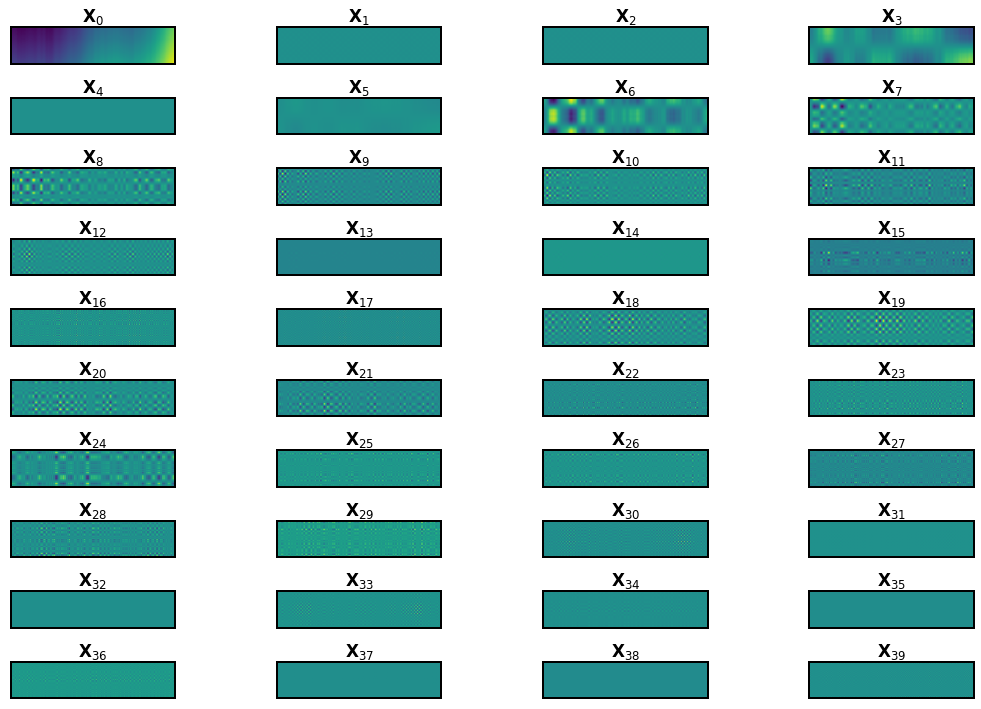

In [11]:
n = min(12, d) # In case d is less than 12 -if we were to exclude the noise component...
for i in range(d//9):
    plt.subplot(d//36,4,i+1)
    title = "$\mathbf{X}_{" + str(i) + "}$"
    plot_2d(Xi[i], title)
plt.tight_layout()
plt.savefig('Output/lat-elem-matrices.png', bbox_inches = 'tight')

From visual inspection of the  Xi  above, it is obvious that the elementary matrices lack the anti-diagonal structure of the trajectory matrix. Without inspecting the  Ui  vector associated with each  Xi , or reconstructing a time series of each component, the appearance of the  Xi  hints at the nature of each component, be it trend, periodicity or noise

#### Plotting relative and cumulative contributions of S[i]

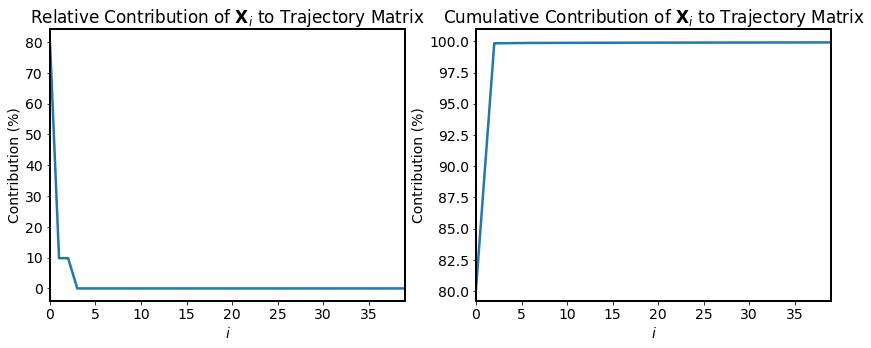

In [12]:
sqS = (S**2).sum()
fig, ax = plt.subplots(1, 2, figsize=(14,5))
ax[0].plot(S**2 / sqS * 100, lw=2.5)
ax[0].set_xlim(0,39)
ax[0].set_title("Relative Contribution of $\mathbf{X}_i$ to Trajectory Matrix")
ax[0].set_xlabel("$i$")
ax[0].set_ylabel("Contribution (%)")
ax[1].plot((S**2).cumsum() / sqS * 100, lw=2.5)
ax[1].set_xlim(0,39)
ax[1].set_title("Cumulative Contribution of $\mathbf{X}_i$ to Trajectory Matrix")
ax[1].set_xlabel("$i$")
ax[1].set_ylabel("Contribution (%)")
plt.savefig('Output/lat-contributions.png', bbox_inches = 'tight')

# RECONSTRUCTION

## EIGENTRIPLE GROUPING

 Elementary matrices that make equal contributions to the expansion (that is,  σi≈σi+1 ) are likely to be grouped together when reconstructing the time series, and appear as "breaks" in the plot of relative contributions.

In [13]:
def X_to_TS(Xi):
    """
    Performs (anti-) diagonal averaging on given elementary matrix, Xi, and returns a time series.
    """
    Xrev = Xi[::-1]
    return np.array([Xrev.diagonal(i).mean() for i in range(-Xi.shape[0]+1, Xi.shape[1])])

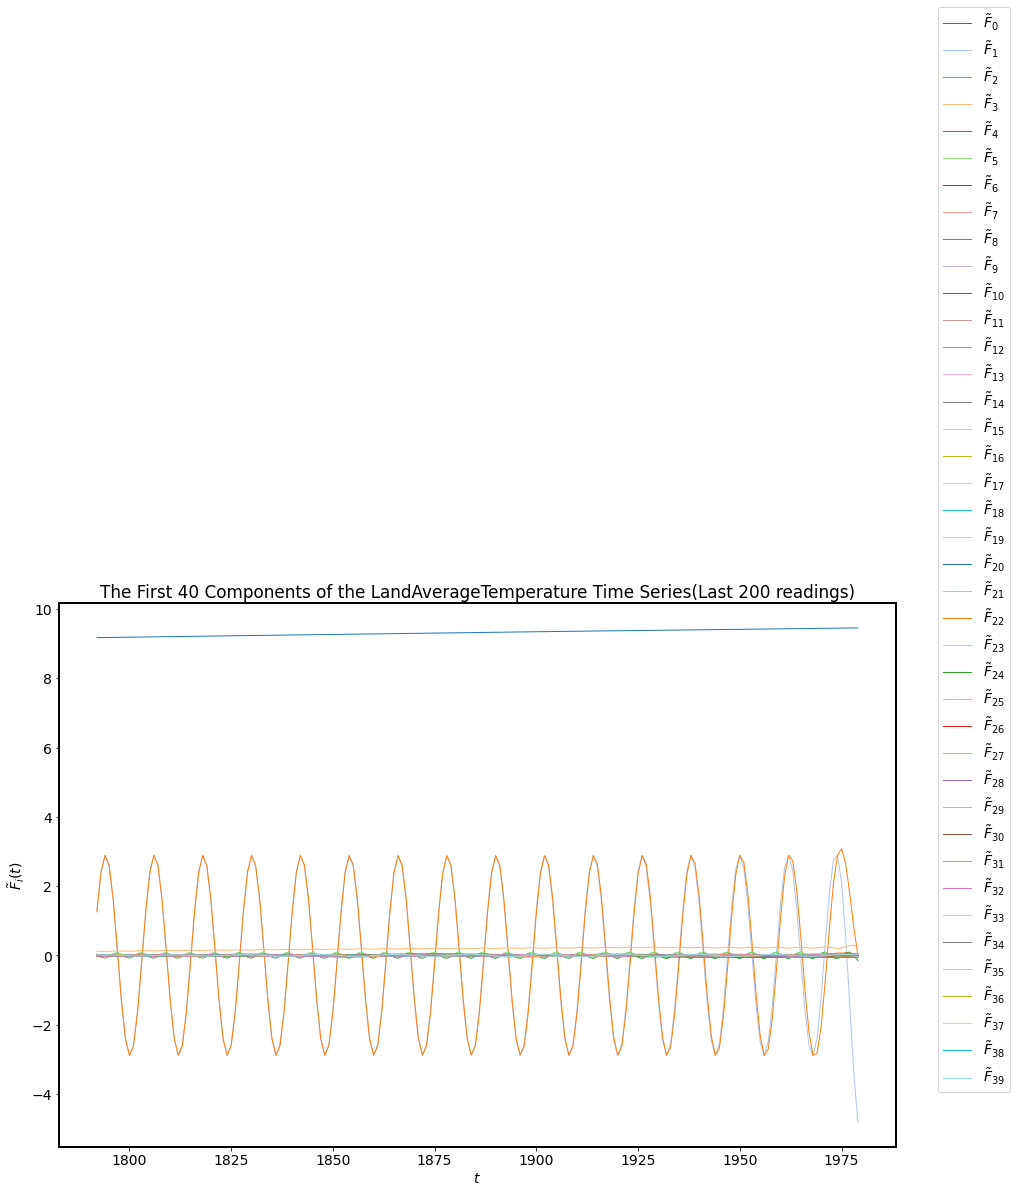

In [14]:
n = min(40,d)# In case of noiseless time series with d < 12.
t = np.arange(0, len(lat))

fig = plt.subplot()
color_cycle = cycler(color=plt.get_cmap('tab20').colors)
fig.axes.set_prop_cycle(color_cycle)

# Convert elementary matrices straight to a time series
for i in range(n):
    Fi = X_to_TS(Xi[i])
    fig.axes.plot(t[1792:], Fi[1792:], lw=1)#lw stands for linewidth

# fig.axes.plot(t[1792:]        , lat[1792:], alpha = 1, lw = 1)
fig.set_xlabel("$t$")
fig.set_ylabel(r"$\tilde{F}_i(t)$")
legend = [r"$\tilde{F}_{%s}$" %i for i in range(n)] + ["$F$"]
fig.set_title("The First 40 Components of the LandAverageTemperature Time Series(Last 200 readings)")
fig.legend(legend, loc=(1.05,0.1));
plt.savefig('Output/lat-f40l200-components.png', bbox_inches = 'tight')

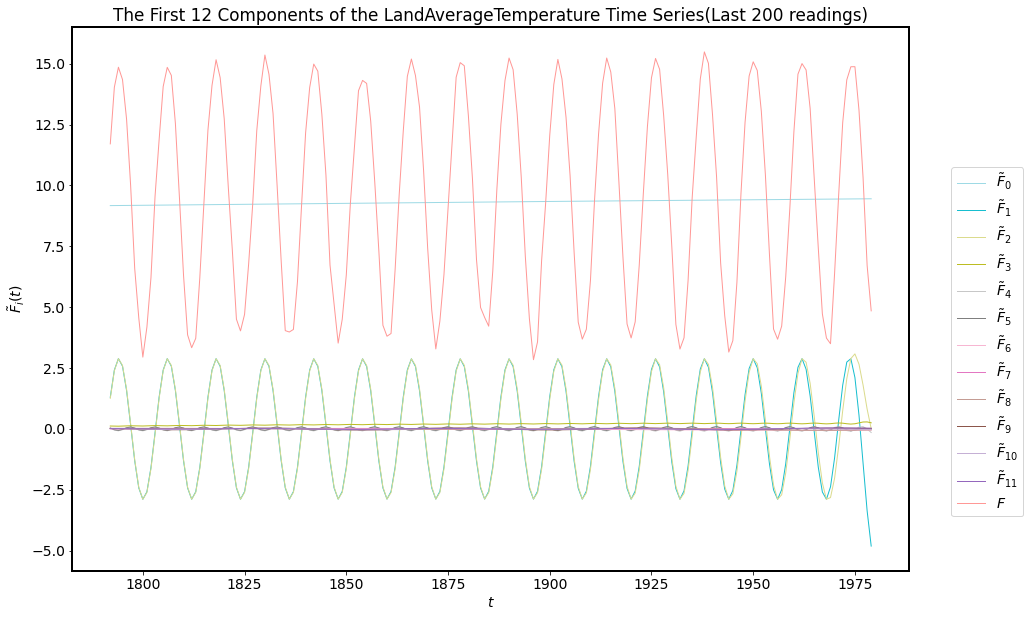

In [15]:
n = min(12,d)# In case of noiseless time series with d < 12.
t = np.arange(0, len(lat))

fig = plt.subplot()
color_cycle = cycler(color=plt.get_cmap('tab20_r').colors)
fig.axes.set_prop_cycle(color_cycle)

# Convert elementary matrices straight to a time series
for i in range(n):
    Fi = X_to_TS(Xi[i])
    fig.axes.plot(t[1792:], Fi[1792:], lw=1)#lw stands for linewidth, last 200 points bc 1992 points are not clear

fig.axes.plot(t[1792:]        , lat[1792:], alpha = 1, lw = 1)
fig.set_xlabel("$t$")
fig.set_ylabel(r"$\tilde{F}_i(t)$")
legend = [r"$\tilde{F}_{%s}$" %i for i in range(n)]  + ["$F$"]
fig.set_title("The First 12 Components of the LandAverageTemperature Time Series(Last 200 readings)")
fig.legend(legend, loc=(1.05,0.1));
plt.savefig('Output/lat-f12-l200-components.png', bbox_inches = 'tight')

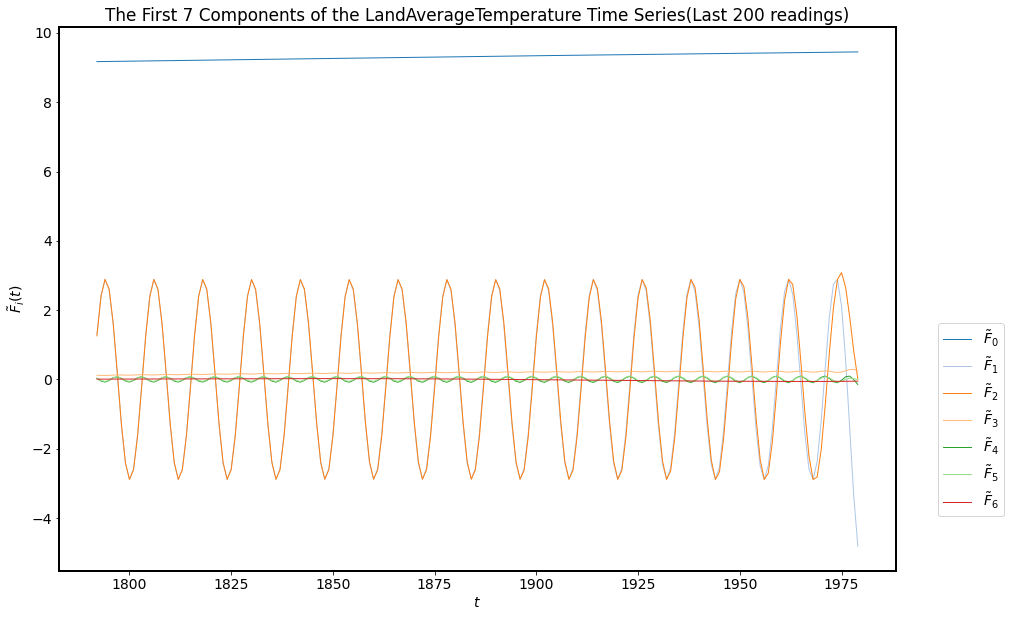

In [16]:
n = min(7,d)# In case of noiseless time series with d < 12.
t = np.arange(0, len(lat))

fig = plt.subplot()
color_cycle = cycler(color=plt.get_cmap('tab20').colors)
fig.axes.set_prop_cycle(color_cycle)

# Convert elementary matrices straight to a time series
for i in range(n):
    Fi = X_to_TS(Xi[i])
    fig.axes.plot(t[1792:], Fi[1792:], lw=1)#lw stands for linewidth, last 200 points bc 1992 points are not clear

# fig.axes.plot(t[1792:]        , lat[1792:], alpha = 1, lw = 1)
fig.set_xlabel("$t$")
fig.set_ylabel(r"$\tilde{F}_i(t)$")
legend = [r"$\tilde{F}_{%s}$" %i for i in range(n)] #  + ["$F$"]
fig.set_title("The First 7 Components of the LandAverageTemperature Time Series(Last 200 readings)")
fig.legend(legend, loc=(1.05,0.1));
plt.savefig('Output/lat-f7-l200-components.png', bbox_inches = 'tight')

### Observation: F0 | F3, F6 contribute to trend; F1, F2 | F4, F5 contribute to periodicity, rest is noise

In [17]:
# EIGENTRIPLE GROUPING
Ftrend1 = X_to_TS(Xi[0])
Ftrend2 = X_to_TS(Xi[[3,6]].sum(axis=0))
Fperiodic1 = X_to_TS(Xi[[1,2]].sum(axis=0))
Fperiodic2 = X_to_TS(Xi[[4,5]].sum(axis=0))
Fnoise = X_to_TS(Xi[7:].sum(axis=0))

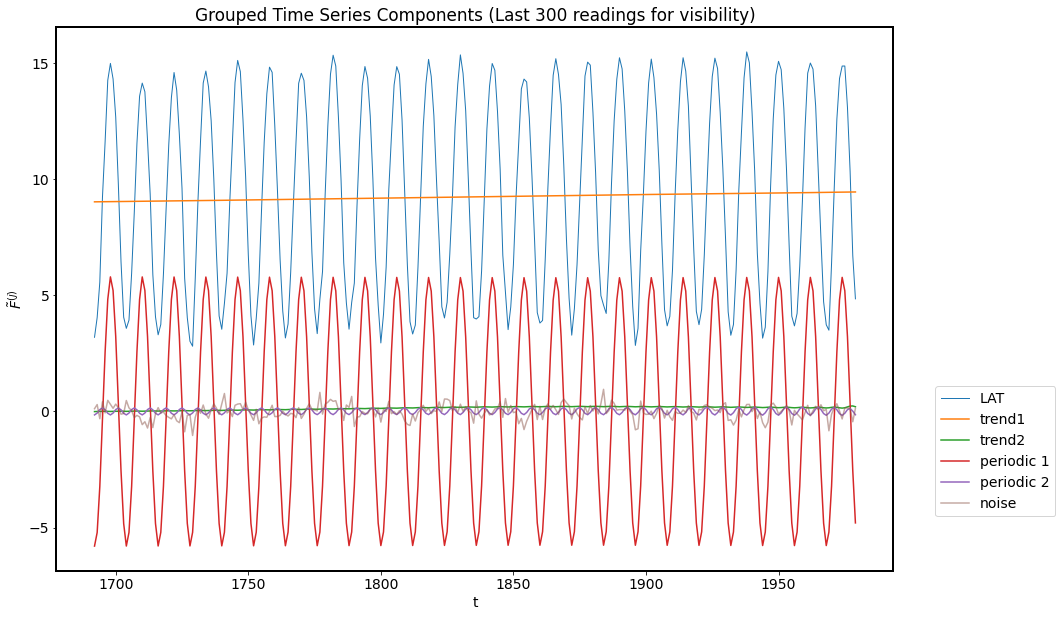

In [18]:
plt.plot(t[1692:], lat[1692:], lw=1)
plt.plot(t[1692:], Ftrend1[1692:])
plt.plot(t[1692:], Ftrend2[1692:])
plt.plot(t[1692:], Fperiodic1[1692:])
plt.plot(t[1692:], Fperiodic2[1692:])
plt.plot(t[1692:], Fnoise[1692:], alpha=0.5)
plt.xlabel("t")
plt.ylabel(r"$\tilde{F}^{(j)}$")
groups = ["trend1", "trend2", "periodic 1", "periodic 2", "noise"]
legend = ["LAT"] + groups
plt.legend(legend, loc=(1.05,0.1))
plt.title("Grouped Time Series Components (Last 300 readings for visibility)")
plt.savefig('Output/lat-l200-components-grouped.png', bbox_inches = 'tight')

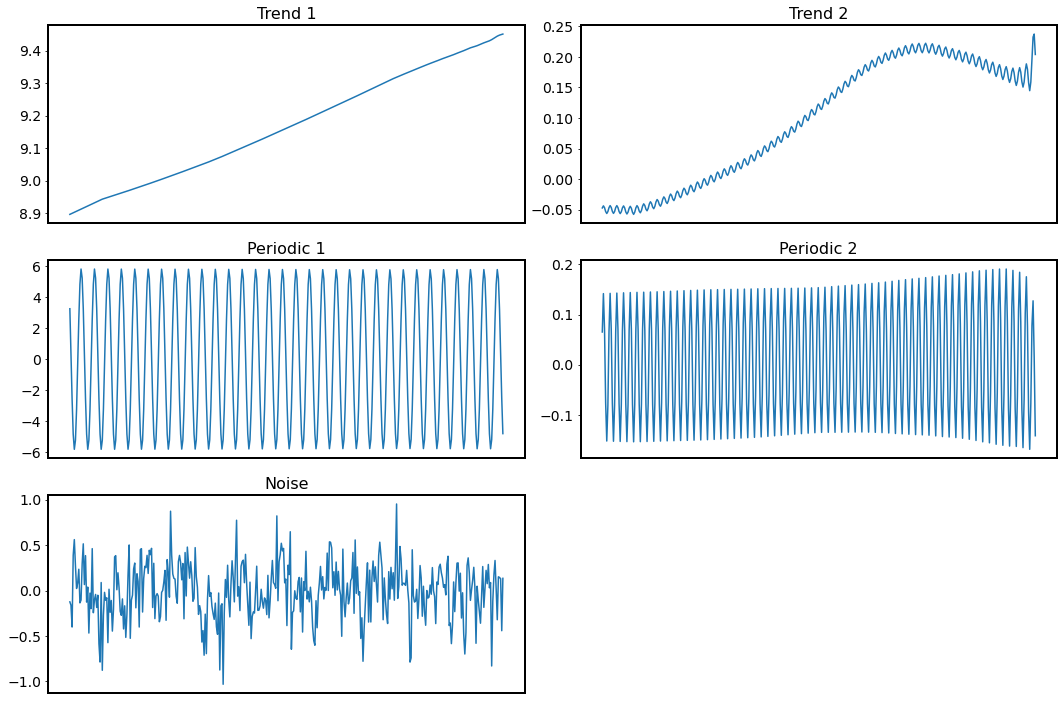

In [19]:
components = [("Trend 1", Ftrend1),
              ("Trend 2", Ftrend2),
              ("Periodic 1", Fperiodic1),
              ("Periodic 2", Fperiodic2),
              ("Noise", Fnoise)]

# Plotting the components separately
fig = plt.figure()
n=1
for name, ssa_comp in components:
    ax = fig.add_subplot(3,2,n)
    ax.plot(t[1592:], ssa_comp[1592:])
    ax.set_title(name, fontsize=16)
    ax.set_xticks([])
    n += 1

fig.tight_layout()
plt.savefig('Output/lat-l400-components-grouped-sep.png', bbox_inches = 'tight')

## EIGENTRIPLE GROUPING, BUT ITS NOT VISUAL

In [20]:
# wk = k+1 for 0 <= k <= L-1
# wk = L   for L <= k <= K-1
# wk = N-k for K <= k <= N-1
N = len(lat)
# Get the array of weights as defined above
w = np.array(list(np.arange(L)+1) + [L]*(K-L-1) + list(np.arange(L)+1)[::-1])

In [21]:
# Compute all components Fi, store them as columns in Fi array.
Fi = np.array([X_to_TS(Xi[i]) for i in range(d)])
Fi.shape

(360, 1980)

In [22]:
# Calculate the individual weighted norms, ||Fi||w, first, then take inverse square-root
# inverse square root because it goes in the denominator while calculating an entry in W-corr
# ||Fi||w = sqrt((Fi, Fi)w) --> (i,i)w denotes weighted inner product
Fwnorms = np.array([np.dot(w, Fi[i]**2) for i in range(d)])
Fwnorms = Fwnorms**-0.5
Fwnorms.shape

(360,)

In [23]:
# Calculate the w-corr matrix. The diagonal elements are equal to 1, so we can start with an identity matrix
# and iterate over all pairs of i's and j's (i != j), noting that Wij = Wji.
Wcorr = np.identity(d)
for i in range(d):
    for j in range(i+1,d):
        Wcorr[i,j] = abs(w.dot(Fi[i]*Fi[j]) * Fwnorms[i] * Fwnorms[j])
        Wcorr[j,i] = Wcorr[i,j]

Text(0.5, 1.0, 'The W-Correlation Matrix for the LandAverageTemperature Time Series')

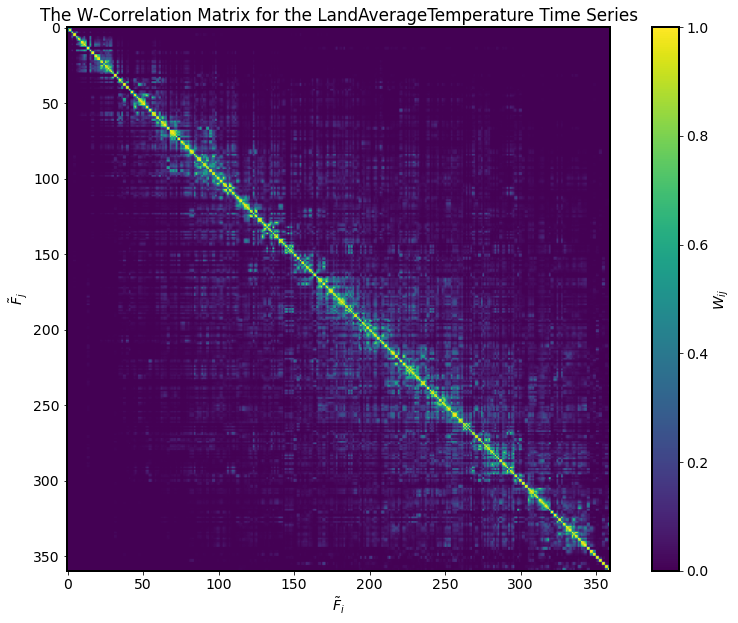

In [24]:
ax = plt.imshow(Wcorr)
plt.xlabel(r"$\tilde{F}_i$")
plt.ylabel(r"$\tilde{F}_j$")
plt.colorbar(ax.colorbar, fraction=0.045)
ax.colorbar.set_label("$W_{ij}$")
plt.clim(0,1)
plt.title("The W-Correlation Matrix for the LandAverageTemperature Time Series")

In [25]:
for i in range(1, 7):
    for j in range(d):
        if(Wcorr[i][j] > 0.3):
            print(i, "  ", j, "   ", Wcorr[i][j])

1    1     1.0
1    2     0.9998480219364663
2    1     0.9998480219364663
2    2     1.0
3    3     1.0
3    6     0.37038340188918867
4    4     1.0
4    5     0.9965668361279391
5    4     0.9965668361279391
5    5     1.0
6    3     0.37038340188918867
6    6     1.0
6    7     0.42226923979686665
6    15     0.42368059728211444


### All these have non-negligible W correlations with each other and are grouped together as noise

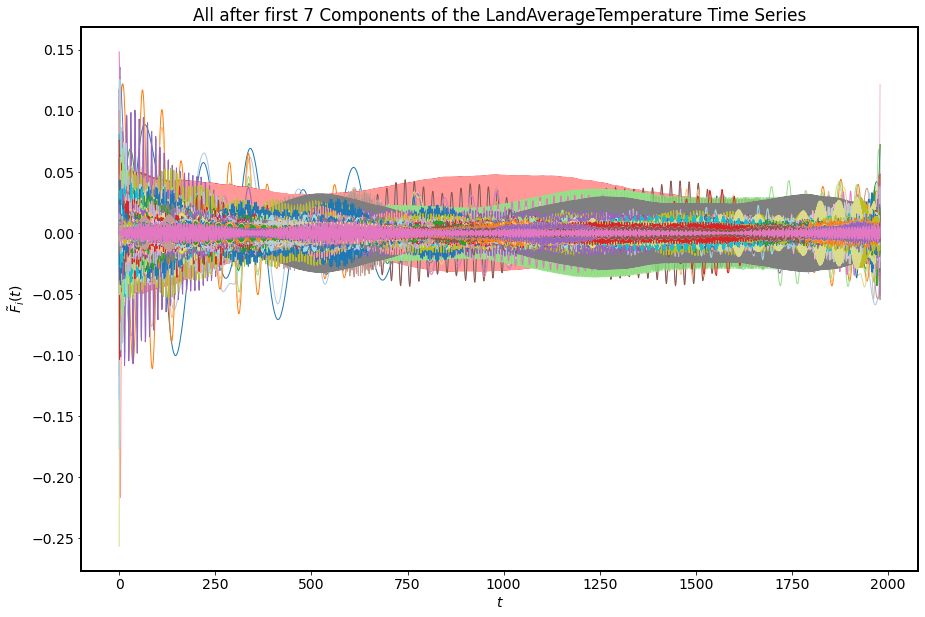

In [26]:
# n = min(7,d)# In case of noiseless time series with d < 12.
t = np.arange(0, len(lat))

fig = plt.subplot()
color_cycle = cycler(color=plt.get_cmap('tab20').colors)
fig.axes.set_prop_cycle(color_cycle)

# Convert elementary matrices straight to a time series
for i in range(7, d):
    Fi = X_to_TS(Xi[i])
    fig.axes.plot(t, Fi, lw=1)#lw stands for linewidth, last 200 points bc 1992 points are not clear

# fig.axes.plot(t[1792:]        , lat[1792:], alpha = 1, lw = 1)
fig.set_xlabel("$t$")
fig.set_ylabel(r"$\tilde{F}_i(t)$")
# legend = [r"$\tilde{F}_{%s}$" %i for i in range(n)] #  + ["$F$"]
fig.set_title("All after first 7 Components of the LandAverageTemperature Time Series")
# fig.legend(legend, loc=(1.05,0.1));
plt.savefig('Output/lat-af7all-components.png', bbox_inches = 'tight')

### Varies in very small range and no particular pattern after 7 - considered noise

In [27]:
# EIGENTRIPLE GROUPING & RECONSTRUCTION
Ftrend = X_to_TS(Xi[[0,3,6,7]].sum(axis=0))
Fperiodic = X_to_TS(Xi[[1,2,4,5]].sum(axis=0))
Fnoise = X_to_TS(Xi[8:].sum(axis=0))

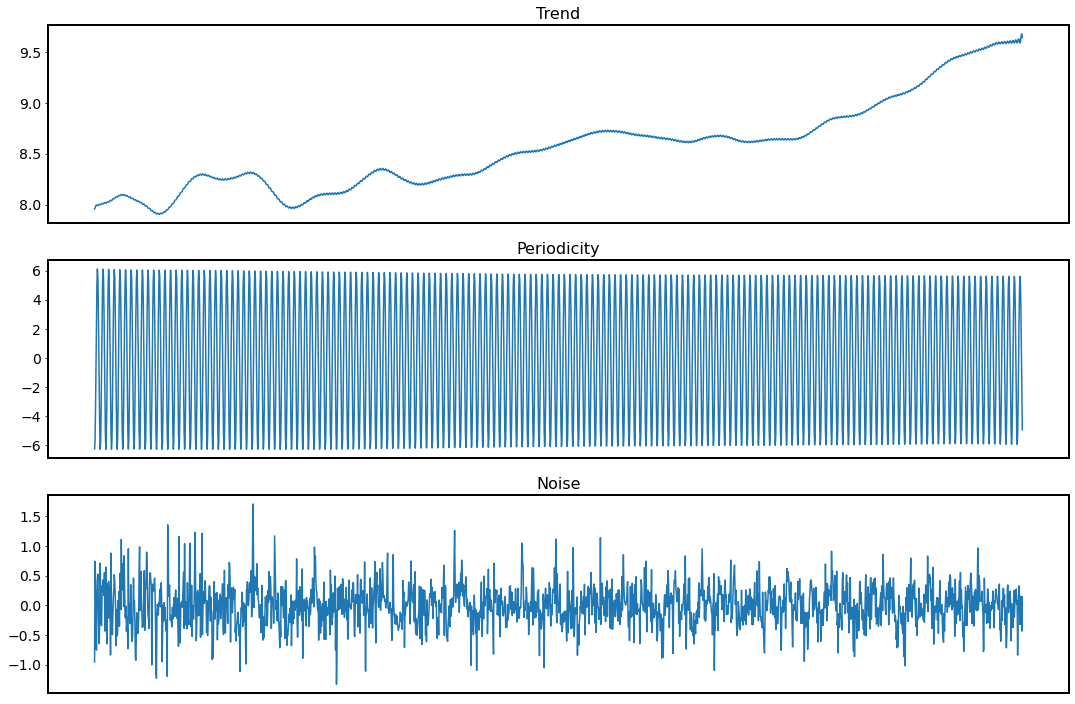

In [28]:
components = [("Trend", Ftrend),
              ("Periodicity", Fperiodic),
              ("Noise", Fnoise)]

# Plotting the components separately
fig = plt.figure()
n=1
for name, ssa_comp in components:
    ax = fig.add_subplot(3,1,n)
    ax.plot(t, ssa_comp)
    ax.set_title(name, fontsize=16)
    ax.set_xticks([])
    n += 1

fig.tight_layout()
plt.savefig('Output/lat-components-grouped-sep.png', bbox_inches = 'tight')

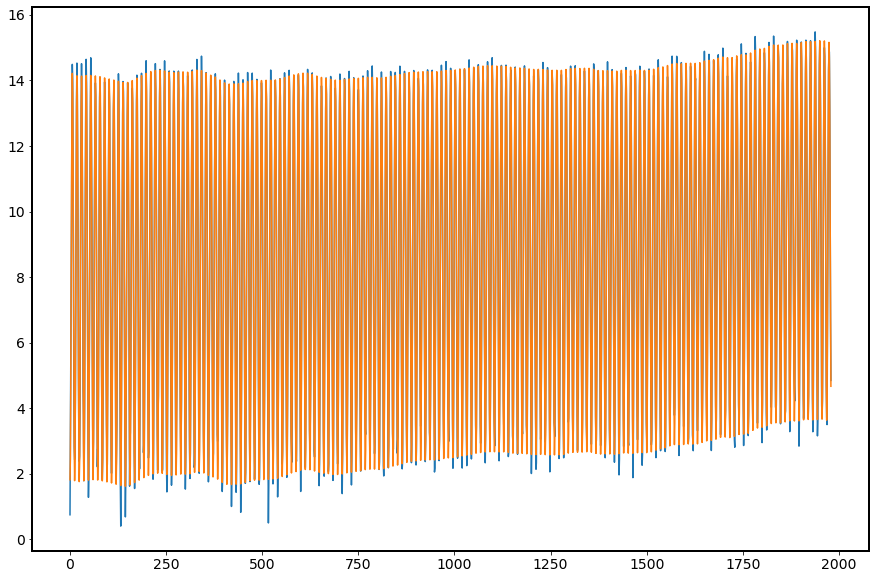

In [29]:
plt.plot(t, lat)
lat_without_noise = X_to_TS(Xi[[0,1,2,3,4,5,6,7,15]].sum(axis=0))
plt.plot(t, lat_without_noise)

In [30]:
# Mean squared error
((lat-lat_without_noise)**2).mean()

0.11470162060322986

In [31]:
X.shape
#L = 360
#K = 1633

(360, 1621)

# FORECASTING ALGORITHM - RECURRENT FORECASTING

yL = a1 yL−1 + a2 yL−2 + ... + aL−1 y1,
where the vector R = (aL−1,..., a1)T can be expressed as
R = (1/1−ν^2)summation(i=1,r;πi*Pi) 

In [32]:
def get_contributions(X=None, s=None):
        '''Calculate the relative contribution of each of the singular values'''
        lambdas = np.power(s,2)
        frob_norm = npla.norm(X)
        ret = pd.DataFrame(lambdas/(frob_norm**2), columns=['Contribution']) # frobenius norm
        ret['Contribution'] = ret.Contribution.round(4)
        return ret[ret.Contribution>0]

In [33]:
s_contributions = get_contributions(X, S)
r = len(s_contributions[s_contributions>0])
r_characteristic = round((S[:r]**2).sum()/(S**2).sum(),4)
forecast_orthonormal_base = {i:U[:,i] for i in range(r)}

In [34]:
import scipy.linalg as spla
X_container = np.zeros(X.shape)
verticality_coefficient = 0
R = np.zeros(forecast_orthonormal_base[0].shape)[:-1]
for Pi in forecast_orthonormal_base.values():
    X_container += np.dot(((Pi*Pi.T).reshape((1,360))),X)
    pi = np.ravel(Pi)[-1]
    verticality_coefficient += pi**2
    R += pi*Pi[:-1]
R = (R/(1-verticality_coefficient))

In [35]:
Q = 12
R = R[::-1]
forecasted_lat = np.zeros(Q)
latwn = list(lat_without_noise)
for i in range(N, N+Q):
    s = 0
    for j in range(L-1):
        s += (R[j]*latwn[i-j-1])
    latwn.append(s)
forecasted_lat = latwn[N:]
forecasted_lat

[3.761622059691145,
 4.439479700645634,
 6.578158792474421,
 9.478705281101119,
 12.307756723968362,
 14.377455313319127,
 15.260052351385992,
 14.776137368436501,
 12.986045276899103,
 10.243474976873964,
 7.227181877300352,
 4.8157266899410995]

In [36]:
test

1980     3.881
1981     4.664
1982     6.740
1983     9.313
1984    12.312
1985    14.505
1986    15.051
1987    14.755
1988    12.999
1989    10.801
1990     7.433
1991     5.518
Name: LandAverageTemperature, dtype: float64

In [37]:
((test-forecasted_lat)**2).mean()

0.08544145653867756

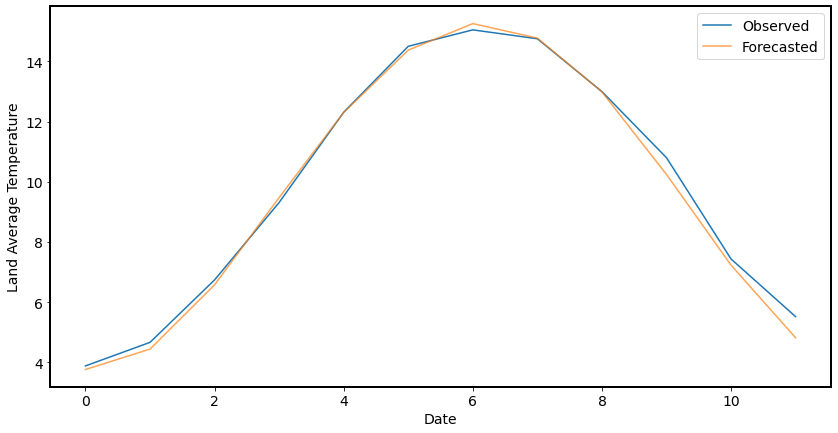

In [45]:
ax = pd.DataFrame(list(test)).plot(label='observed')
pd.DataFrame(forecasted_lat).plot(ax=ax, label='Forecasted', alpha=.7, figsize=(14, 7))
ax.set_xlabel('Date')
ax.set_ylabel('Land Average Temperature')
plt.legend(['Observed', 'Forecasted'])

plt.savefig('Output/forecast-ssa.png')